In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import warnings

In [2]:
bidhannagar = pd.read_csv('C:/Users/shova/iCloudDrive/Kolkata_data/Work/Semi_processed/Bidhannagar.csv')    # reads the bidhannagar file
bidhannagar.head()

,Date,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,AT,AQI,AQI_Standard
0,2019-08-21,11.24,43.98,180.59,9.30,6.10,0.25,15.18,30.25,200.59,Poor
1,2019-08-22,21.28,45.70,83.86,5.42,8.01,0.18,36.86,29.28,103.86,Moderately Polluted
2,2019-08-23,7.80,19.51,180.59,118.91,2.12,0.20,43.98,28.81,200.59,Poor
3,2019-08-24,7.48,19.47,277.32,232.41,2.93,0.18,40.97,27.42,297.32,Poor
4,2019-08-25,7.10,16.46,33.16,38.57,1.47,0.18,62.44,27.42,62.44,Satisfactory


In [3]:
bidhannagar['Date'] = pd.to_datetime(bidhannagar['Date'], format="%Y-%m-%d") # converts the date values to proper date format from string for plotting purposes
bidhannagar["month"] = bidhannagar["Date"].dt.month
bidhannagar["week"] = bidhannagar["Date"].dt.strftime('%V').astype('int64')
bidhannagar["week_day"] = bidhannagar["Date"].dt.weekday
bidhannagar.head()

,Date,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,AT,AQI,AQI_Standard,month,week,week_day
0,2019-08-21,11.24,43.98,180.59,9.30,6.10,0.25,15.18,30.25,200.59,Poor,8,34,2
1,2019-08-22,21.28,45.70,83.86,5.42,8.01,0.18,36.86,29.28,103.86,Moderately Polluted,8,34,3
2,2019-08-23,7.80,19.51,180.59,118.91,2.12,0.20,43.98,28.81,200.59,Poor,8,34,4
3,2019-08-24,7.48,19.47,277.32,232.41,2.93,0.18,40.97,27.42,297.32,Poor,8,34,5
4,2019-08-25,7.10,16.46,33.16,38.57,1.47,0.18,62.44,27.42,62.44,Satisfactory,8,34,6


In [4]:
bidhannagar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1229 non-null   datetime64[ns]
 1   PM2.5         1229 non-null   float64       
 2   PM10          1229 non-null   float64       
 3   NO2           1229 non-null   float64       
 4   NH3           1229 non-null   float64       
 5   SO2           1229 non-null   float64       
 6   CO            1229 non-null   float64       
 7   Ozone         1229 non-null   float64       
 8   AT            1229 non-null   float64       
 9   AQI           1229 non-null   float64       
 10  AQI_Standard  1229 non-null   object        
 11  month         1229 non-null   int64         
 12  week          1229 non-null   int64         
 13  week_day      1229 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(3), object(1)
memory usage: 134.5+ KB


## Support Vector Regression

In [5]:
model_svr = SVR(kernel = 'rbf', C=100,  epsilon=0.1)

### PM 2.5

In [6]:
data_pm25 = pd.DataFrame()
data_pm25["month"] = bidhannagar["month"]
data_pm25["week"] = bidhannagar["week"]
data_pm25["week_day"] = bidhannagar["week_day"]
data_pm25["PM2.5"] = bidhannagar["PM2.5"]
cols = data_pm25.columns
data_pm25.head()

,month,week,week_day,PM2.5
0,8,34,2,11.24
1,8,34,3,21.28
2,8,34,4,7.80
3,8,34,5,7.48
4,8,34,6,7.10


In [7]:
# shuffling the data set
data_pm25 = shuffle(data_pm25, random_state=1).reset_index(drop=True)
data_pm25.head()

,month,week,week_day,PM2.5
0,3,10,0,85.27
1,3,11,1,62.71
2,9,38,6,16.90
3,10,41,5,25.05
4,7,29,1,25.20


In [8]:
duplicate_pm25 = data_pm25.copy()

In [9]:
#normalizing the dataset
data_pm25 = preprocessing.normalize(data_pm25,norm='l2')
data_pm25 = pd.DataFrame(data_pm25, columns=cols)

In [10]:
X_pm25 = data_pm25.drop('PM2.5', axis=1) #data basically refere to the values in the independent columns
X_pm25.shape

(1229, 3)

In [11]:
y_pm25 = data_pm25.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)
y_pm25.shape      

(1229, 1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_pm25, y_pm25, test_size=0.2, random_state=42)

In [13]:
bidhannagar_pm25_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [14]:
predictions_pm25 = bidhannagar_pm25_svr.predict(X_test)

In [15]:
r2 = r2_score(y_test, predictions_pm25)
print('r2 score for  model is', r2)

r2 score for  model is 0.9530461825294894


In [16]:
#RSME - Root Mean Square Error
predictions_pm25 = predictions_pm25.reshape(y_test.shape[0],1)
np.sqrt(((predictions_pm25 - y_test)**2).mean())

PM2.5    0.057304
dtype: float64

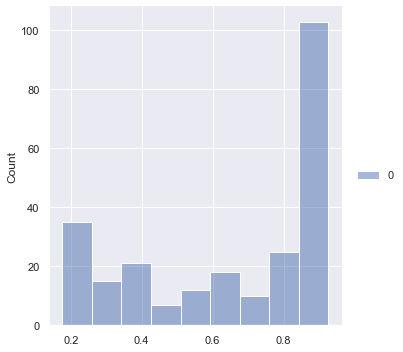

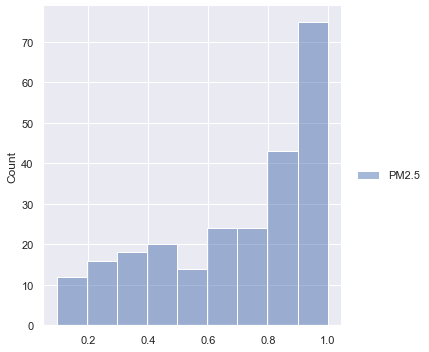

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_pm25)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

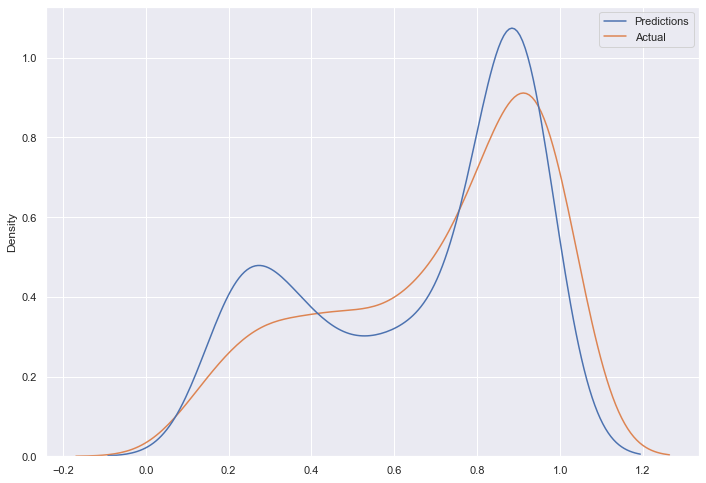

In [18]:
results = pd.DataFrame(predictions_pm25, columns = ['Predictions'])
results["Actual"] = list(y_test["PM2.5"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### PM10

In [19]:
data_pm10 = pd.DataFrame()
data_pm10["month"] = bidhannagar["month"]
data_pm10["week"] = bidhannagar["week"]
data_pm10["week_day"] = bidhannagar["week_day"]
data_pm10["PM10"] = bidhannagar["PM10"]
cols = data_pm10.columns
data_pm10.head()

,month,week,week_day,PM10
0,8,34,2,43.98
1,8,34,3,45.70
2,8,34,4,19.51
3,8,34,5,19.47
4,8,34,6,16.46


In [20]:
# shuffling the data set
data_pm10 = shuffle(data_pm10, random_state=1).reset_index(drop=True)
data_pm10.head()

,month,week,week_day,PM10
0,3,10,0,157.76
1,3,11,1,137.72
2,9,38,6,37.18
3,10,41,5,62.07
4,7,29,1,58.66


In [21]:
duplicate_pm10 = data_pm10.copy()

In [22]:
#normalizing the dataset
data_pm10 = preprocessing.normalize(data_pm10,norm='l2')
data_pm10 = pd.DataFrame(data_pm10, columns=cols)

In [23]:
X_pm10  = data_pm10.drop('PM10', axis=1) #data basically refere to the values in the independent columns
y_pm10  = data_pm10.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_pm10, y_pm10, test_size=0.2, random_state=42)

In [25]:
bidhannagar_pm10_model_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [26]:
predictions_pm10 = bidhannagar_pm10_model_svr.predict(X_test)

In [27]:
r2 = r2_score(y_test, predictions_pm10)
print('r2 score for   model is', r2)

r2 score for   model is 0.6958090544521816


In [28]:
predictions_pm10.shape

(246,)

In [29]:
#RSME - Root Mean Square Error
predictions4 = predictions_pm10.reshape(y_test.shape[0],1)
np.sqrt(((predictions4 - y_test)**2).mean())

PM10    0.089708
dtype: float64

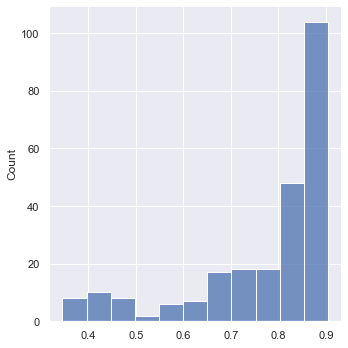

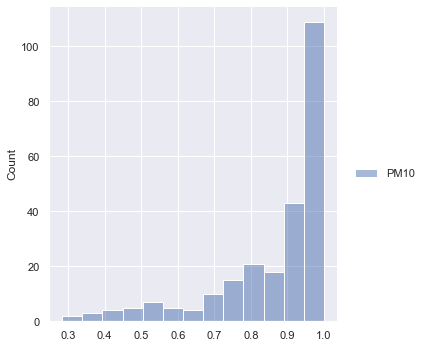

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_pm10)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

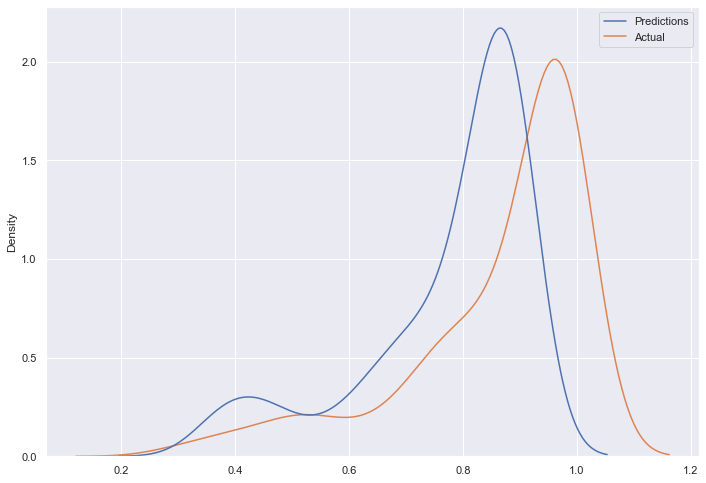

In [31]:
results = pd.DataFrame(predictions_pm10, columns = ['Predictions'])
results["Actual"] = list(y_test["PM10"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### NO2

In [32]:
data_no2 = pd.DataFrame()
data_no2["month"] = bidhannagar["month"]
data_no2["week"] = bidhannagar["week"]
data_no2["week_day"] = bidhannagar["week_day"]
data_no2["NO2"] = bidhannagar["NO2"]
cols = data_no2.columns
data_no2.head()

,month,week,week_day,NO2
0,8,34,2,180.59
1,8,34,3,83.86
2,8,34,4,180.59
3,8,34,5,277.32
4,8,34,6,33.16


In [33]:
# shuffling the data set
data_no2=shuffle(data_no2, random_state=1).reset_index(drop=True)
data_no2.head()

,month,week,week_day,NO2
0,3,10,0,38.55
1,3,11,1,30.09
2,9,38,6,11.68
3,10,41,5,19.81
4,7,29,1,22.96


In [34]:
duplicate_no2 = data_no2.copy()

In [35]:
#normalizing the dataset
data_no2 = preprocessing.normalize(data_no2,norm='l2')
data_no2 = pd.DataFrame(data_no2, columns=cols)

In [36]:
X_no2 = data_no2.drop('NO2', axis=1) #data basically refere to the values in the independent columns
y_no2 = data_no2.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_no2, y_no2, test_size=0.2, random_state=42)

In [38]:
bidhannagar_no2_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [39]:
predictions_no2 = bidhannagar_no2_svr.predict(X_test)

In [40]:
r2 = r2_score(y_test, predictions_no2)
print('r2 score for   model is', r2)

r2 score for   model is 0.9566687685025287


In [41]:
predictions_no2.shape

(246,)

In [42]:
#RSME - Root Mean Square Error
predictions5 = predictions_no2.reshape(y_test.shape[0],1)
np.sqrt(((predictions5 - y_test)**2).mean())

NO2    0.060519
dtype: float64

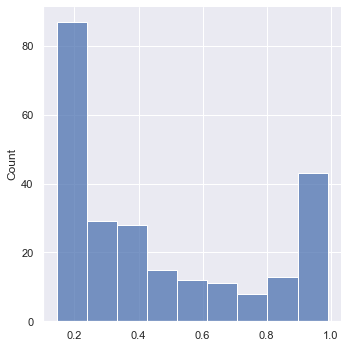

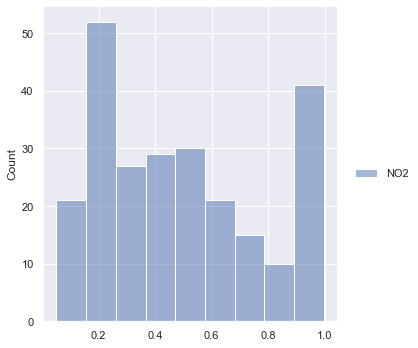

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_no2)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

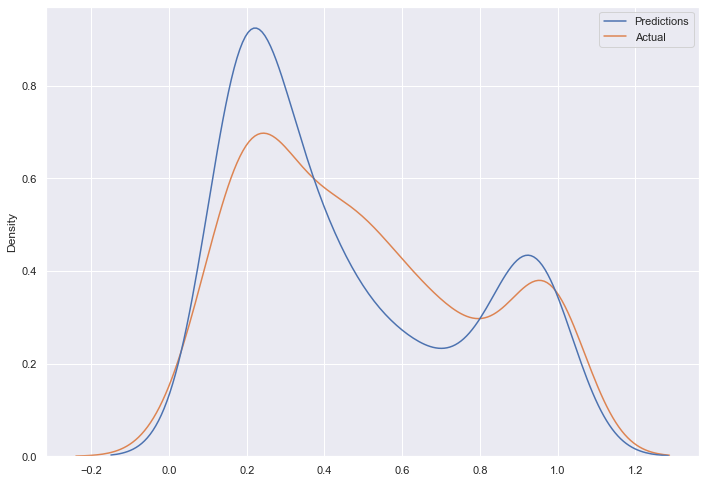

In [44]:
results = pd.DataFrame(predictions_no2, columns = ['Predictions'])
results["Actual"] = list(y_test["NO2"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### NH3

In [45]:
data_nh3 = pd.DataFrame()
data_nh3["month"] = bidhannagar["month"]
data_nh3["week"] = bidhannagar["week"]
data_nh3["week_day"] = bidhannagar["week_day"]
data_nh3["NH3"] = bidhannagar["NH3"]
cols = data_nh3.columns
data_nh3.head()

,month,week,week_day,NH3
0,8,34,2,9.30
1,8,34,3,5.42
2,8,34,4,118.91
3,8,34,5,232.41
4,8,34,6,38.57


In [46]:
# shuffling the data set
data_nh3 = shuffle(data_nh3, random_state=1).reset_index(drop=True)
data_nh3.head()

,month,week,week_day,NH3
0,3,10,0,33.63
1,3,11,1,13.78
2,9,38,6,12.52
3,10,41,5,12.49
4,7,29,1,12.08


In [47]:
duplicate_nh3 = data_nh3.copy()

In [48]:
#normalizing the dataset
data_nh3 = preprocessing.normalize(data_nh3,norm='l2')
data_nh3 = pd.DataFrame(data_nh3, columns=cols)

In [49]:
X_nh3  = data_nh3.drop('NH3', axis=1) #data basically refere to the values in the independent columns
y_nh3  = data_nh3.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_nh3, y_nh3, test_size=0.2, random_state=42)

In [51]:
bidhannagar_nh3_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [52]:
predictions_nh3 = bidhannagar_nh3_svr.predict(X_test)

In [53]:
r2 = r2_score(y_test, predictions_nh3)
print('r2 score for   model is', r2)

r2 score for   model is 0.9564731216211002


In [54]:
predictions_nh3.shape

(246,)

In [55]:
#RSME - Root Mean Square Error
predictions5 = predictions_nh3.reshape(y_test.shape[0],1)
np.sqrt(((predictions5 - y_test)**2).mean())

NH3    0.05759
dtype: float64

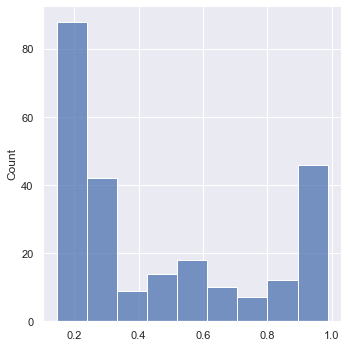

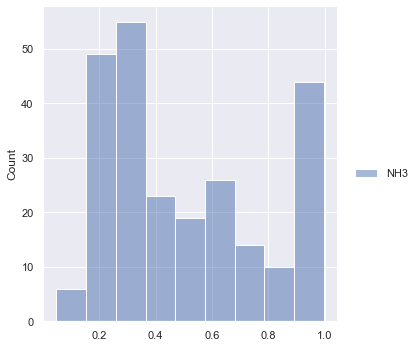

In [56]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_nh3)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

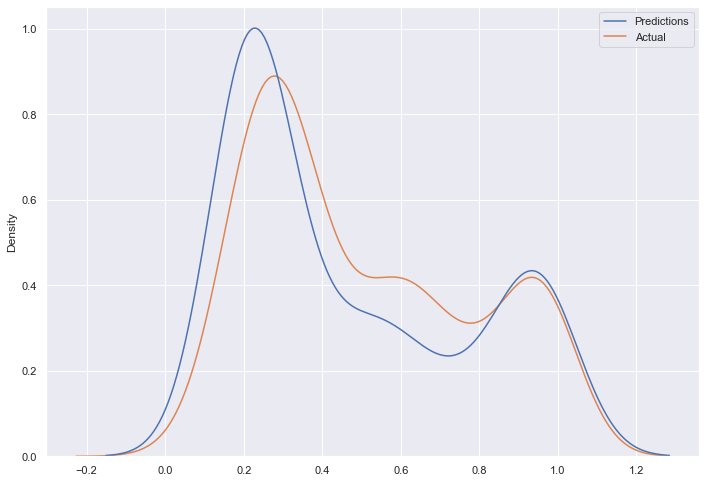

In [57]:
results = pd.DataFrame(predictions_nh3, columns = ['Predictions'])
results["Actual"] = list(y_test["NH3"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### SO2

In [58]:
data_so2 = pd.DataFrame()
data_so2["month"] = bidhannagar["month"]
data_so2["week"] = bidhannagar["week"]
data_so2["week_day"] = bidhannagar["week_day"]
data_so2["SO2"] = bidhannagar["SO2"]
cols = data_so2.columns
data_so2.head()

,month,week,week_day,SO2
0,8,34,2,6.10
1,8,34,3,8.01
2,8,34,4,2.12
3,8,34,5,2.93
4,8,34,6,1.47


In [59]:
# shuffling the data set
data_so2 = shuffle(data_so2, random_state=1).reset_index(drop=True)
data_so2.head()

,month,week,week_day,SO2
0,3,10,0,15.85
1,3,11,1,18.29
2,9,38,6,7.66
3,10,41,5,5.75
4,7,29,1,3.35


In [60]:
duplicate_so2 = data_so2.copy()

In [61]:
#normalizing the dataset
data_so2 = preprocessing.normalize(data_so2,norm='l2')
data_so2 = pd.DataFrame(data_so2, columns=cols)

In [62]:
X_so2 = data_so2.drop('SO2', axis=1) #data basically refere to the values in the independent columns
y_so2 = data_so2.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_so2, y_so2, test_size=0.2, random_state=42)

In [64]:
bidhannagar_so2_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [65]:
predictions_so2 = bidhannagar_so2_svr.predict(X_test)

In [66]:
r2 = r2_score(y_test, predictions_so2)
print('r2 score for   model is', r2)

r2 score for   model is 0.9544336267123246


In [67]:
predictions_so2.shape

(246,)

In [68]:
#RSME - Root Mean Square Error
predictions5 = predictions_so2.reshape(y_test.shape[0],1)
np.sqrt(((predictions5 - y_test)**2).mean())

SO2    0.059239
dtype: float64

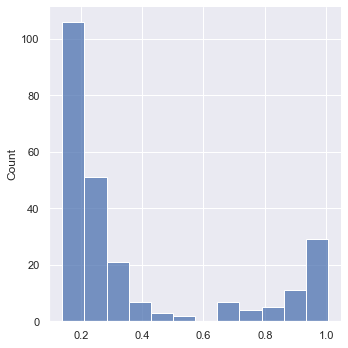

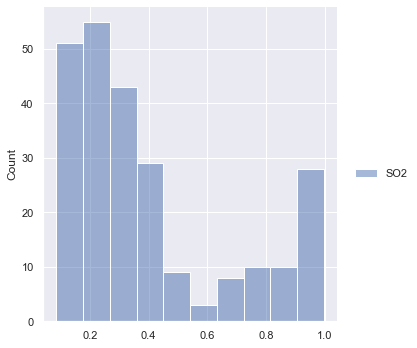

In [69]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_so2)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

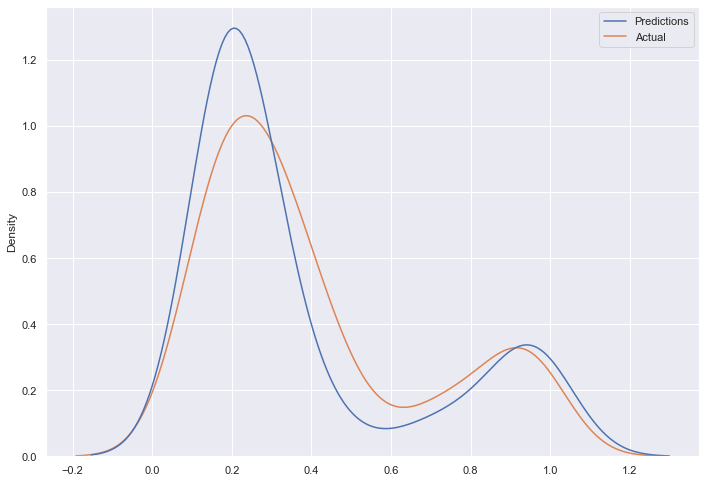

In [70]:
results = pd.DataFrame(predictions_so2, columns = ['Predictions'])
results["Actual"] = list(y_test["SO2"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### CO

In [71]:
data_co = pd.DataFrame()
data_co["month"] = bidhannagar["month"]
data_co["week"] = bidhannagar["week"]
data_co["week_day"] = bidhannagar["week_day"]
data_co["CO"] = bidhannagar["CO"]
cols = data_co.columns
data_co.head()

,month,week,week_day,CO
0,8,34,2,0.25
1,8,34,3,0.18
2,8,34,4,0.20
3,8,34,5,0.18
4,8,34,6,0.18


In [72]:
# shuffling the data set
data_co = shuffle(data_co, random_state=1).reset_index(drop=True)
data_co.head()

,month,week,week_day,CO
0,3,10,0,0.77
1,3,11,1,0.45
2,9,38,6,0.23
3,10,41,5,0.69
4,7,29,1,0.08


In [73]:
duplicate_co = data_co.copy()

In [74]:
'''#normalizing the dataset
data_co = preprocessing.normalize(data_co,norm='l2')
data_co = pd.DataFrame(data_co, columns=cols)'''
# Normalization is not working properly in terms of carbon monoxide

"#normalizing the dataset\ndata_co = preprocessing.normalize(data_co,norm='l2')\ndata_co = pd.DataFrame(data_co, columns=cols)"

In [75]:
X_co = data_co.drop('CO', axis=1) #data basically refere to the values in the independent columns
y_co = data_co.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_co, y_co, test_size=0.2, random_state=42)

In [77]:
bidhannagar_co_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [78]:
predictions_co = bidhannagar_co_svr.predict(X_test)

In [79]:
r2 = r2_score(y_test, predictions_co)
print('r2 score for   model is', r2)

r2 score for   model is 0.4860942079196383


In [80]:
predictions_so2.shape

(246,)

In [81]:
#RSME - Root Mean Square Error
predictions5 = predictions_so2.reshape(y_test.shape[0],1)
np.sqrt(((predictions5 - y_test)**2).mean())

CO    0.48374
dtype: float64

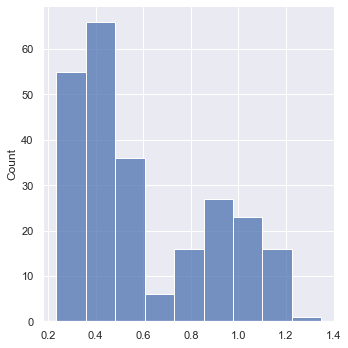

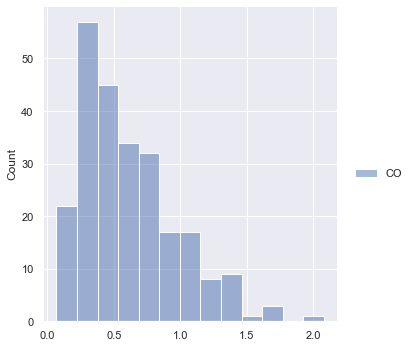

In [82]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_co)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

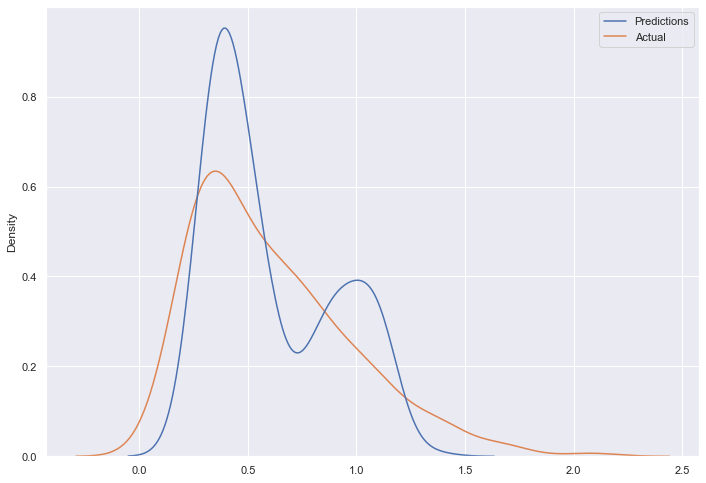

In [83]:
results = pd.DataFrame(predictions_co, columns = ['Predictions'])
results["Actual"] = list(y_test["CO"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### Ozone

In [84]:
data_ozone = pd.DataFrame()
data_ozone["month"] = bidhannagar["month"]
data_ozone["week"] = bidhannagar["week"]
data_ozone["week_day"] = bidhannagar["week_day"]
data_ozone["Ozone"] = bidhannagar["Ozone"]
cols = data_ozone.columns
data_ozone.head()

,month,week,week_day,Ozone
0,8,34,2,15.18
1,8,34,3,36.86
2,8,34,4,43.98
3,8,34,5,40.97
4,8,34,6,62.44


In [85]:
# shuffling the data set
data_ozone = data_ozone.sample(frac=1).reset_index(drop=True)
data_ozone.head()

,month,week,week_day,Ozone
0,4,16,5,61.09
1,11,47,3,42.91
2,10,41,5,21.01
3,12,51,6,11.12
4,11,46,5,41.53


In [86]:
duplicate_ozone = data_ozone.copy()

In [87]:
#normalizing the dataset
data_ozone = preprocessing.normalize(data_ozone,norm='l2')
data_ozone = pd.DataFrame(data_ozone, columns=cols)

In [88]:
X_o3 = data_ozone.drop('Ozone', axis=1) #data basically refere to the values in the independent columns
y_o3 = data_ozone.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_o3, y_o3, test_size=0.2, random_state=42)

In [90]:
bidhannagar_ozone_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [91]:
predictions_ozone = bidhannagar_ozone_svr.predict(X_test)

In [92]:
r2 = r2_score(y_test, predictions_ozone)
print('r2 score for   model is', r2)

r2 score for   model is 0.9185232423007381


In [93]:
predictions_ozone.shape

(246,)

In [94]:
#RSME - Root Mean Square Error
predictions5 = predictions_ozone.reshape(y_test.shape[0],1)
np.sqrt(((predictions5 - y_test)**2).mean())

Ozone    0.061908
dtype: float64

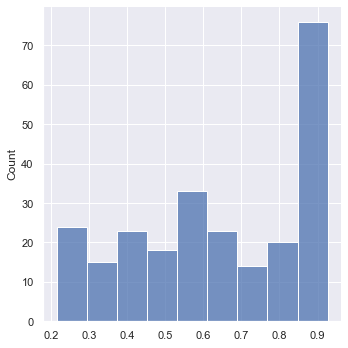

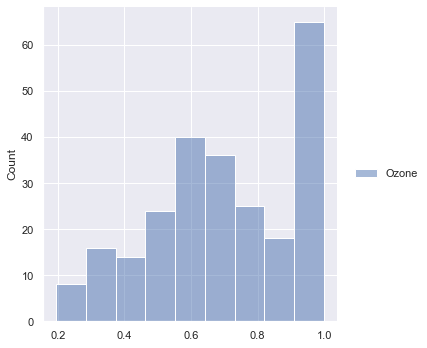

In [95]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_ozone)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

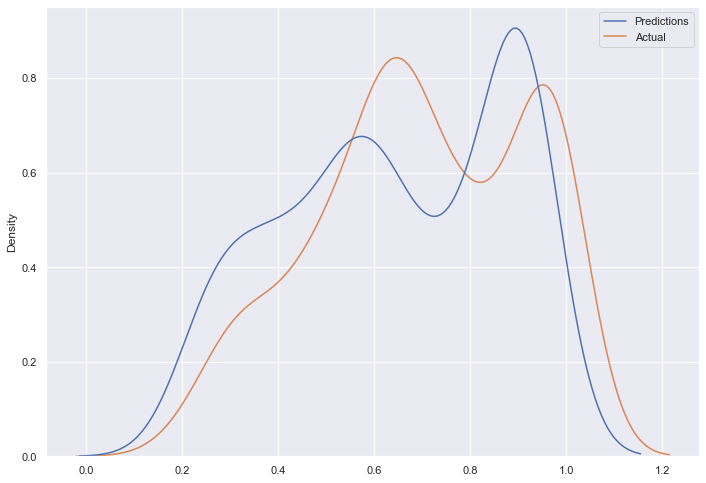

In [96]:
results = pd.DataFrame(predictions_ozone, columns = ['Predictions'])
results["Actual"] = list(y_test["Ozone"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### Prediction Functions

In [97]:
##1. PM2.5 Sub-Index calculation
def PM25(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

##2. PM10 Sub-Index calculation
def PM10(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

##3. NO2 Sub-Index calculation
def NO2(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0


##4. NH3 Sub-Index calculation
def NH3(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

##5. SO2 Sub-Index calculation
def SO2(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

##6. CO Sub-Index calculation
def CO(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

##7. O3 Sub-Index calculation
def O3(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

In [98]:
def aqi(l):
    final = max(PM25(l[0]),PM10(l[1]),NO2(l[2]),NH3(l[3]),SO2(l[4]),CO(l[5]),O3(l[6]))
    if final >=0 and final<=50:
        return([round(final,2),"Good"])
    elif final>50 and final<=100:
        return([round(final,2),"Satisfactory"])
    elif final>100 and final<= 200:
        return([round(final,2),"Moderately Polluted"])
    elif final>200 and final<=300:
        return([round(final,2),"Poor"])
    elif final>300 and final<=400:
        return([round(final,2),"Very poor"])
    elif final>400:
        return([round(final,2),"Severe"])

In [99]:
def predictor_pm25(query, model_pm25,data_pm25,X):
    results = [] 
    location = data_pm25.loc[(data_pm25['month'] == query[0]) & (data_pm25['week'] == query[1]) & (data_pm25['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_pm25.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_pm25.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_pm10(query, model_pm10,data_pm10,X):
    results = [] 
    location = data_pm10.loc[(data_pm10['month'] == query[0]) & (data_pm10['week'] == query[1]) & (data_pm10['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_pm10.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_pm10.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_no2(query, model_no2, data_no2,X):
    results = []
    location = data_no2.loc[(data_no2['month'] == query[0]) & (data_no2['week'] == query[1]) & (data_no2['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_no2.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_no2.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_nh3(query, model_nh3, data_nh3,X):
    results = [] 
    location = data_nh3.loc[(data_nh3['month'] == query[0]) & (data_nh3['week'] == query[1]) & (data_nh3['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_nh3.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_nh3.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_so2(query, model_so2,data_so2,X):
    results = [] 
    location = data_so2.loc[(data_so2['month'] == query[0]) & (data_so2['week'] == query[1]) & (data_so2['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_so2.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_so2.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_co(query, model_co,data_co,X):
    results = [] 
    location = data_co.loc[(data_co['month'] == query[0]) & (data_co['week'] == query[1]) & (data_co['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_co.predict(np.array(query).reshape(1,-1)))
    return(sum(results) / len(results))

def predictor_o3(query, model_o3,data_o3,X):
    results = []
    location = data_o3.loc[(data_o3['month'] == query[0]) & (data_o3['week'] == query[1]) & (data_o3['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_o3.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_o3.loc[l]**2)))
    return(sum(results) / len(results))

In [100]:
def precal(date, model_pm25,model_pm10,model_no2,model_nh3,model_so2,model_co,model_o3,data_pm25,data_pm10,data_no2, data_nh3,data_so2,data_co,data_o3,X_pm25,X_pm10,X_no2,X_nh3,X_so2,X_co,X_o3):
    query = []
    result = []
    date = pd.DataFrame(date)
    date[0] = pd.to_datetime(date[0],format="%Y-%m-%d")
    query.append(list(date[0].dt.month)[0])
    query.append(list(date[0].dt.strftime('%V').astype('int64'))[0])
    query.append(list(date[0].dt.weekday)[0])
    result.append(predictor_pm25(query,model_pm25, data_pm25,X_pm25))
    result.append(predictor_pm10(query,model_pm10, data_pm10,X_pm10))
    result.append(predictor_no2(query,model_no2, data_no2,X_no2))
    result.append(predictor_nh3(query,model_nh3, data_nh3,X_nh3))
    result.append(predictor_so2(query,model_so2, data_so2,X_so2))
    result.append(predictor_co(query,model_co, data_co,X_co))
    result.append(predictor_o3(query,model_o3, data_o3,X_o3))
    ans = aqi(result)
    print("Expected:-\nPM 2.5: " + str(result[0])+"\nPM 10: " + str(result[1])+"\nNO2: " + str(result[2])+"\nNH3: " + str(result[3])+"\nSO2: " + str(result[4])+"\nCO: " + str(result[5])+"\nO3: " + str(result[6]))
    print("\nThe AQI value is expected to be arouynd " + str(ans[0]) + " and the index is expected to be " + ans[1])
    

In [101]:
warnings.filterwarnings(action='ignore', category=FutureWarning) # setting ignore as a parameter and further adding category
warnings.filterwarnings(action='ignore', category=UserWarning) # setting ignore as a parameter and further adding category
precal(["2019-08-30"],bidhannagar_pm25_svr,bidhannagar_pm10_model_svr,bidhannagar_no2_svr,bidhannagar_nh3_svr,bidhannagar_so2_svr,bidhannagar_co_svr,bidhannagar_ozone_svr,duplicate_pm25,duplicate_pm10,duplicate_no2,duplicate_nh3,duplicate_so2,duplicate_co,duplicate_ozone,X_pm25,X_pm10,X_no2,X_nh3,X_so2,X_co,X_o3)

Expected:-
PM 2.5: [9.12836906]
PM 10: [26.10588031]
NO2: [8.36439069]
NH3: [8.46834996]
SO2: [7.75796713]
CO: [0.59283329]
O3: [21.30126786]

The AQI value is expected to be arouynd 29.64 and the index is expected to be Good
